<a href="https://colab.research.google.com/github/Ebonica/CODE-CRAFTERS-DATA-SCIENCE-EBONICA-SALETH/blob/main/CODE_CRAFTERS_TASK4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CODE CRAFTERS TASK4 DATA SCIENCE AND MACHINE LEARNING**

**CREDIT CARD FRAUD CLASSIFICATION USING KNN CLASSIFIER**

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

**LOADING THE GIVEN DATASET**

In [2]:
from google.colab import files
uploaded=files.upload()

Saving fraudTrain.csv to fraudTrain.csv


**READING THE GIVEN DATASET**

In [3]:
data = pd.read_csv("fraudTrain.csv")

In [4]:
data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


**DATA EXPLORATION**

In [5]:
data.drop("Unnamed: 0", axis=1, inplace=True)
data.to_csv("updated_dataset.csv", index=False)

In [45]:
nan_rows = data[data.isna().any(axis=1)]

# Printing the rows containing NaN values
print("Rows containing NaN values:")
print(nan_rows)

# Removing rows containing NaN values
data.dropna(inplace=True)

# Saving the updated DataFrame back to a new CSV file or use it for further analysis
data.to_csv("updated_dataset.csv", index= True)

Rows containing NaN values:
Empty DataFrame
Columns: [trans_date_trans_time, cc_num, merchant, category, amt, first, last, gender, street, city, state, zip, lat, long, city_pop, job, dob, trans_num, unix_time, merch_lat, merch_long, is_fraud]
Index: []

[0 rows x 22 columns]


In [7]:
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
  trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ...      lat      long  \
0                561 Perry Cove  Moravian Falls  ...  36.0788  -81.1781   
1

In [8]:
print("Last few rows of the dataset:")
print(data.tail())

Last few rows of the dataset:
        trans_date_trans_time               cc_num  \
1296670   2020-06-21 12:12:08       30263540414123   
1296671   2020-06-21 12:12:19     6011149206456997   
1296672   2020-06-21 12:12:32     3514865930894695   
1296673   2020-06-21 12:13:36     2720012583106919   
1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
1296670                    fraud_Reichel Inc  entertainment   15.56   
1296671             fraud_Abernathy and Sons    food_dining   51.70   
1296672                 fraud_Stiedemann Ltd    food_dining  105.93   
1296673  fraud_Reinger, Weissnat and Strosin    food_dining   74.90   
1296674  fraud_Langosh, Wintheiser and Hyatt    food_dining    4.30   

               first       last gender                         street  \
1296670         Erik  Patterson      M       162 Jessica Row Apt. 072   
1296671      Jeffrey      White      M  8617 Holmes Terrace Suite 651   

In [9]:
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 1

In [10]:
print("\nSummary statistics:")
print(data.describe())


Summary statistics:
             cc_num           amt           zip           lat          long  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   4.171920e+17  7.035104e+01  4.880067e+04  3.853762e+01 -9.022634e+01   
std    1.308806e+18  1.603160e+02  2.689322e+04  5.075808e+00  1.375908e+01   
min    6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01 -1.656723e+02   
25%    1.800429e+14  9.650000e+00  2.623700e+04  3.462050e+01 -9.679800e+01   
50%    3.521417e+15  4.752000e+01  4.817400e+04  3.935430e+01 -8.747690e+01   
75%    4.642255e+15  8.314000e+01  7.204200e+04  4.194040e+01 -8.015800e+01   
max    4.992346e+18  2.894890e+04  9.978300e+04  6.669330e+01 -6.795030e+01   

           city_pop     unix_time     merch_lat    merch_long      is_fraud  
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  
mean   8.882444e+04  1.349244e+09  3.853734e+01 -9.022646e+01  5.788652e-03  
std    3.019564e+05  1.284128e+07

In [11]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [12]:
print("\nColumns:")
print(data.columns)


Columns:
Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')


In [13]:
print("\nShape:")
print(data.shape)


Shape:
(1296675, 22)


In [14]:
print("\nDATA TYPES:")
print(data.dtypes)


DATA TYPES:
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object


In [15]:
print("\n Access the 21th row (index 20)")
data.iloc[20]


 Access the 21th row (index 20)


trans_date_trans_time                 2019-01-01 00:13:08
cc_num                                4469777115158234880
merchant                               fraud_Bauch-Raynor
category                                      grocery_pos
amt                                                 57.34
first                                             Gregory
last                                               Graham
gender                                                  M
street                                    4005 Dana Glens
city                                              Methuen
state                                                  MA
zip                                                  1844
lat                                                42.728
long                                              -71.181
city_pop                                            47249
job                                     Market researcher
dob                                            1980-11-22
trans_num     

In [16]:
unique_counts = data.nunique()
print("Number of unique values in each column:")
print(unique_counts)

Number of unique values in each column:
trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64


In [17]:
nunique_counts = data.nunique()


for column in data.columns:
    unique_values = data[column].unique()
    value_counts = data[column].value_counts()

    print(f"Column: {column}")
    print(f"Number of unique values: {nunique_counts[column]}")
    print(f"Unique values: {unique_values}")
    print(f"Value counts:\n{value_counts}\n")

Column: trans_date_trans_time
Number of unique values: 1274791
Unique values: ['2019-01-01 00:00:18' '2019-01-01 00:00:44' '2019-01-01 00:00:51' ...
 '2020-06-21 12:12:32' '2020-06-21 12:13:36' '2020-06-21 12:13:37']
Value counts:
2019-04-22 16:02:01    4
2020-06-01 01:37:47    4
2020-06-02 12:47:07    4
2019-11-18 23:03:49    3
2019-12-01 14:11:58    3
                      ..
2019-07-13 18:38:18    1
2019-07-13 18:37:26    1
2019-07-13 18:35:46    1
2019-07-13 18:35:41    1
2020-06-21 12:13:37    1
Name: trans_date_trans_time, Length: 1274791, dtype: int64

Column: cc_num
Number of unique values: 983
Unique values: [   2703186189652095        630423337322      38859492057661
    3534093764340240     375534208663984    4767265376804500
      30074693890476    6011360759745864    4922710831011201
    2720830304681674       4642894980163     377234009633447
     180042946491150    5559857416065248    3514865930894695
    6011999606625827    6011860238257910    3565423334076143
    23482

**PREPROCESSING THE DATASET**

In [18]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
normalized_data=data.apply(LabelEncoder().fit_transform)
normalized_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,444,514,8,397,162,18,0,568,526,...,291,693,458,370,779,56438,0,390185,861455,0
1,1,42,241,4,10623,309,157,0,435,612,...,964,60,43,428,607,159395,1,1241513,78062,0
2,2,237,390,0,21906,115,381,1,602,468,...,736,88,486,307,302,818703,2,1033312,119047,0
3,3,509,360,2,4400,163,463,1,930,84,...,931,91,367,328,397,544575,3,1208203,115592,0
4,4,368,297,9,4096,336,149,1,418,216,...,398,753,22,116,734,831111,4,557938,1027546,0


In [19]:
normalized_data.dtypes

trans_date_trans_time    int64
cc_num                   int64
merchant                 int64
category                 int64
amt                      int64
first                    int64
last                     int64
gender                   int64
street                   int64
city                     int64
state                    int64
zip                      int64
lat                      int64
long                     int64
city_pop                 int64
job                      int64
dob                      int64
trans_num                int64
unix_time                int64
merch_lat                int64
merch_long               int64
is_fraud                 int64
dtype: object

**DATA VISUALIZATION**

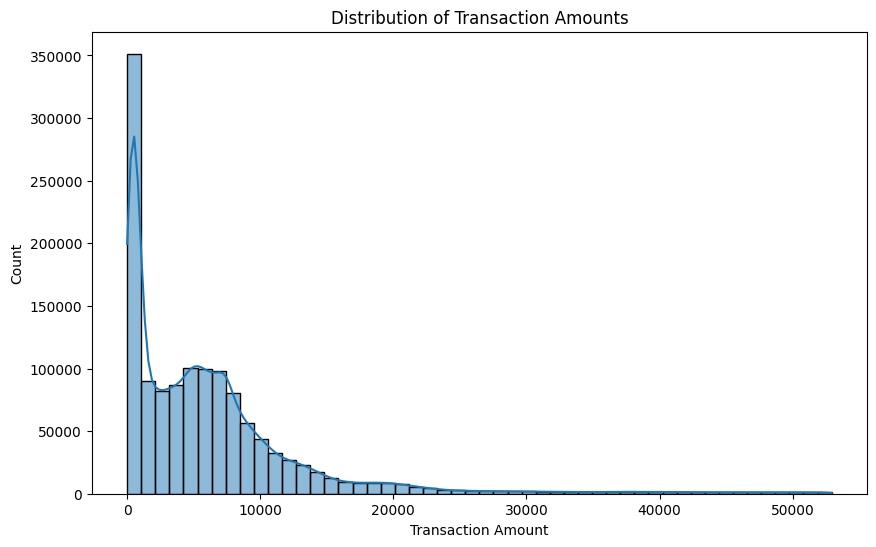

In [20]:
# 1. Distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(normalized_data['amt'], bins=50, kde=True)
plt.xlabel("Transaction Amount")
plt.ylabel("Count")
plt.title("Distribution of Transaction Amounts")
plt.show()

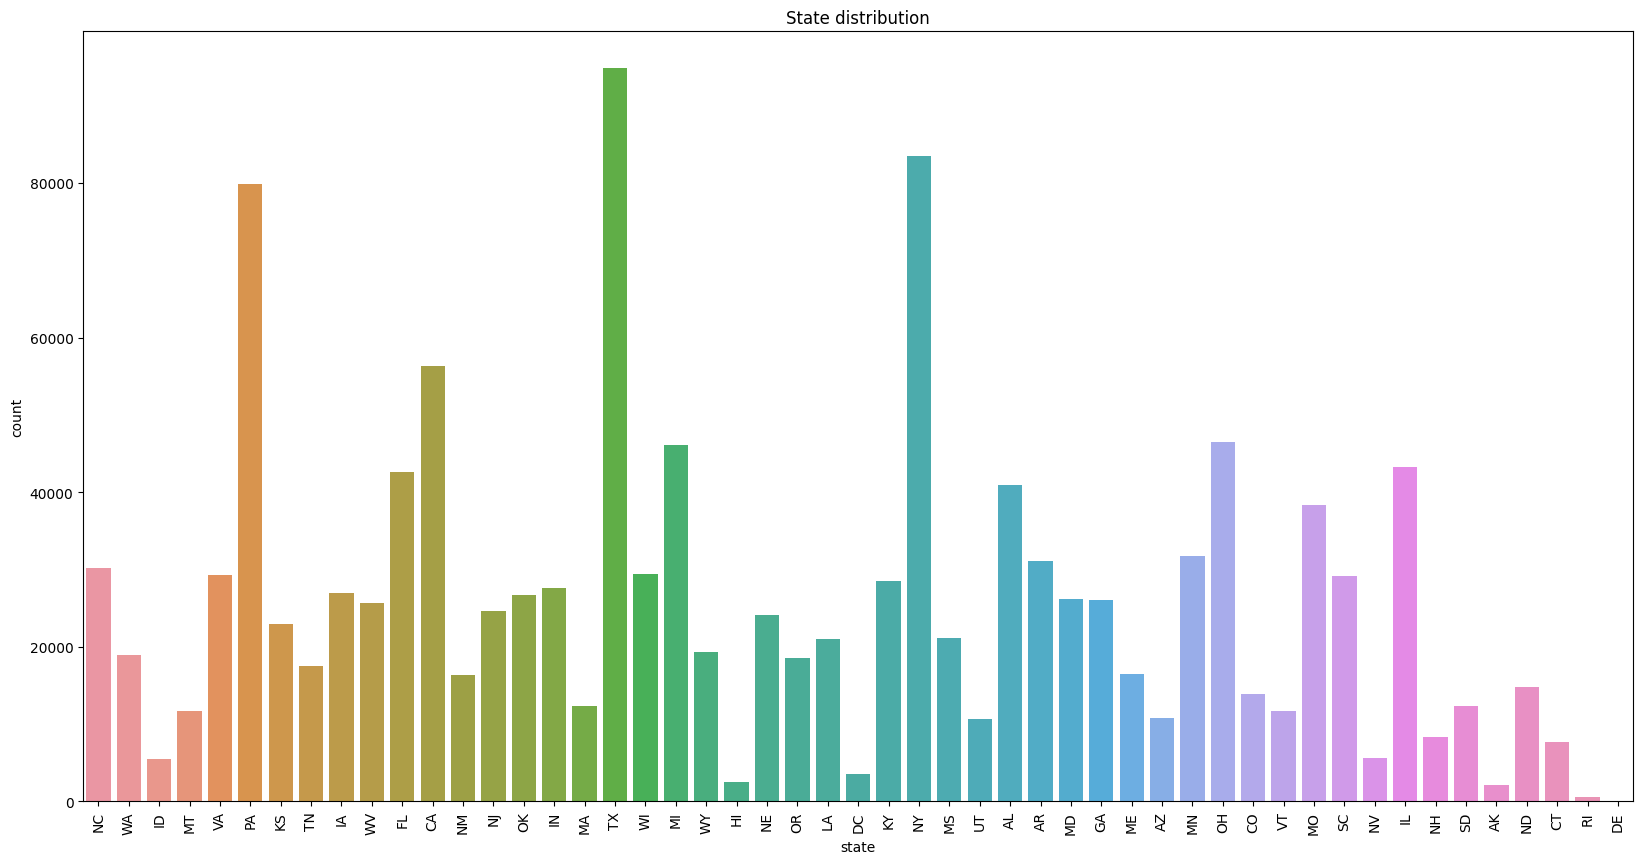

In [21]:
# 2. Bar plot for state
plt.figure(figsize=(20, 10))
sns.countplot(x='state', data=data)
plt.title('State distribution')
plt.xticks(rotation=90)
plt.show()

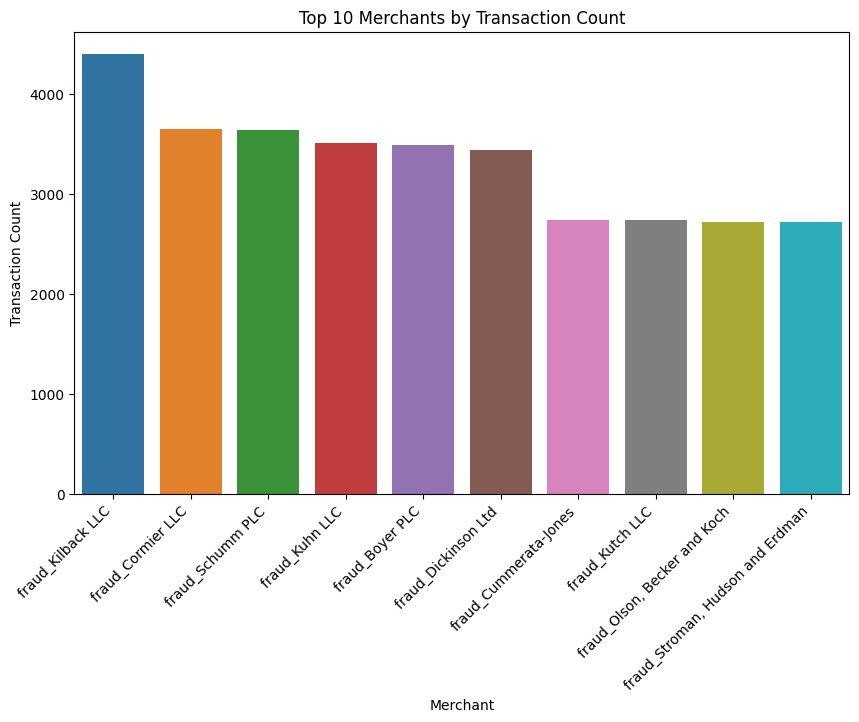

In [22]:
# 3. Top merchants based on transaction counts
top_merchants = data['merchant'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_merchants.index, y=top_merchants.values)
plt.xlabel("Merchant")
plt.ylabel("Transaction Count")
plt.title("Top 10 Merchants by Transaction Count")
plt.xticks(rotation=45, ha='right')
plt.show()

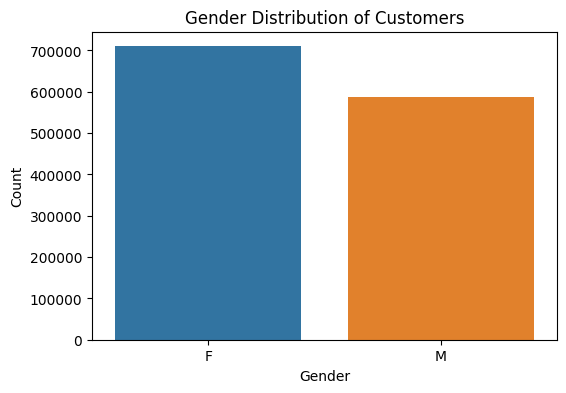

In [23]:
# 4. Gender distribution of customers
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=data)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution of Customers")
plt.show()


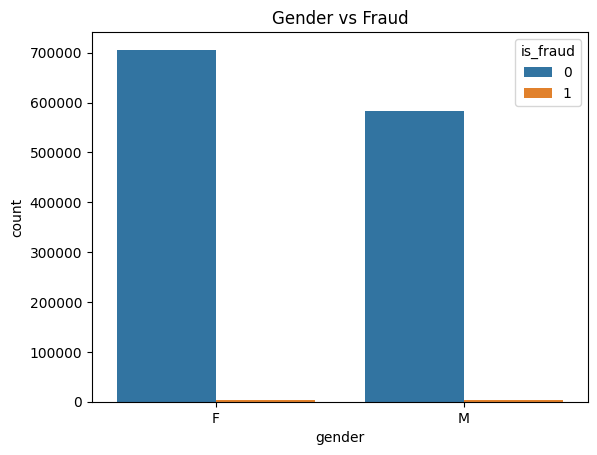

In [24]:
# 5. Count plot for gender vs fraud
sns.countplot(x='gender', hue='is_fraud', data=data)
plt.title("Gender vs Fraud")
plt.show()


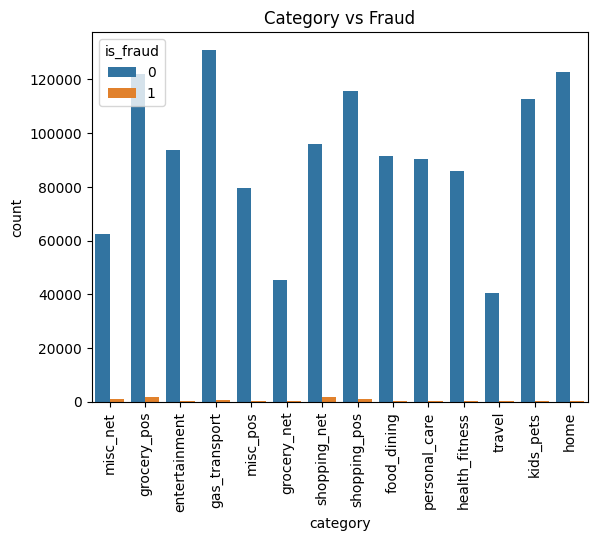

In [25]:
# 6. Count plot for category
sns.countplot(x='category', hue='is_fraud', data=data)
plt.title("Category vs Fraud")
plt.xticks(rotation=90)
plt.show()

**KNN CLASSIFICATION MODEL**

**MODEL TRAINING**

In [46]:
# Droping non-numeric columns like 'trans_date_trans_time', 'merchant', 'category', etc.
X = normalized_data.drop(['trans_date_trans_time', 'merchant', 'category', 'first', 'last', 'gender', 'street', 'trans_num', 'dob', 'is_fraud'], axis=1)
y = normalized_data['is_fraud']

**TRAIN TEST SPLIT**

In [47]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**DATA PREPROCESSING**

In [28]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**MODEL TRAINING**

**K NEAREST NEIGHBOURS CLASSIFIER ALGORITHM**

In [48]:
# Set up the KNN classifier
knn = KNeighborsClassifier()

# Defining hyperparameters to tune
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}

# Initializing GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fitting the classifier to the training data
grid_search.fit(X_train, y_train)

# Getting the best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Predictions on the test set using the best model
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)


Best Hyperparameters: {'n_neighbors': 5, 'weights': 'distance'}


In [49]:
knn = KNeighborsClassifier(n_neighbors=5)

# Fitting the classifier to the training data
knn.fit(X_train, y_train)

# Predictions on the test set
y_pred = knn.predict(X_test)
print("PREDICTED VALUES:",y_pred)

PREDICTED VALUES: [0 0 0 ... 0 0 0]


**MODEL EVALUATION**

**ACCURACY**

In [44]:
# Result analysis
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 1.00


**PRECISION**

In [34]:
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

Precision: 0.63


**RECALL**

In [35]:
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

Recall: 0.47


**F1 SCORE**

In [36]:
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')

F1 Score: 0.54


**CONFUSION MATRIX**

In [37]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

Confusion Matrix:
[[257388    427]
 [   801    719]]


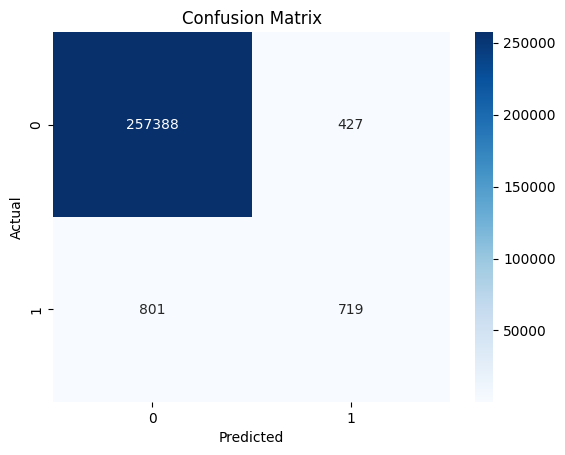

In [42]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**CLASSIFICATION REPORT**

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.63      0.47      0.54      1520

    accuracy                           1.00    259335
   macro avg       0.81      0.74      0.77    259335
weighted avg       0.99      1.00      0.99    259335

